In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=777)
#Fake some data for exhibition purpose
X = np.random.uniform(0,1,500)
X = X.reshape(-1,10)
X = X/X.sum(axis=1, keepdims=True)
#Standardize the dataframe by their columns.
print(X)
#This is a 50 by 10 dataset

import pandas as pd

[[0.02965561 0.05873412 0.01205085 0.08932992 0.16225169 0.18007331
  0.14122085 0.14928381 0.05229428 0.12510556]
 [0.02030949 0.01733237 0.12824609 0.07467954 0.21508912 0.13626334
  0.14829289 0.12012063 0.05847939 0.08118714]
 [0.05114563 0.04277489 0.08962505 0.04431659 0.1401592  0.20253971
  0.14278106 0.05807221 0.04128079 0.18730487]
 [0.0477506  0.10950908 0.10985628 0.12720441 0.11284894 0.00282007
  0.11104308 0.18981553 0.1631228  0.0260292 ]
 [0.05447821 0.11269018 0.13370177 0.08534248 0.14161413 0.03528448
  0.10271843 0.10141323 0.08694955 0.14580755]
 [0.03095311 0.18298075 0.09731351 0.09244568 0.1207292  0.007236
  0.11152488 0.24768777 0.02449548 0.08463363]
 [0.11077125 0.06882256 0.09417583 0.00342672 0.02035481 0.14529483
  0.17536855 0.08901647 0.17806028 0.1147087 ]
 [0.06393487 0.131308   0.01694532 0.16120943 0.06071285 0.16102416
  0.05359734 0.05446387 0.14557015 0.15123402]
 [0.16061732 0.07883656 0.00745718 0.10123452 0.13121565 0.00187096
  0.1962379  0

In [2]:
n = np.shape(X)[0]
p = np.shape(X)[1]
r = 0.25/np.power(np.log10(n),1/p)
print(n,p,r)

50 10 0.23709447706328904


In [3]:
#Row algorithm
m = 1 #pointer for exemplar
row = np.copy(X[0,:])
exemplars = [np.nan]*n
exemplars[0] = row
members = [ [] for _ in range(n) ]

#print(exemplars)
#print(members)

def myRange(start,stop,step):
    if start == stop: 
        return ([stop])
    else:
        return (np.arange(start,stop,step))

def EuclideanDistance(a,b):
    if np.shape(a) != np.shape(b):return(-1)
    dist = 0
    for k in range(np.shape(a)[0]):
        #Try L^2 distance first.
        dist = dist + np.power(a[k] - b[k],2)
    dist = np.sqrt(dist)
    return(dist)

#print('test EuclideanDistance,', EuclideanDistance(np.array([0,0]),np.array([1,2])))
print('r=',r)

#VERBOSE = True for debugging
VERBOSE = False
#RANDOMIZE = True for randomizing the exemplars to reduce the effects of data ordering that the Leader algorithm is subject to.
RANDOMIZE = True
import random
for i in myRange(1,n,1):
    if VERBOSE: print('Handling point ',i,' out of ',n)
    newExemplar = True
    row = np.copy(X[i-1,:])#This should be i-th row, just i-1 since python starts couting from 0-th row.
    exemplar_ord = myRange(1,m,1)
    if RANDOMIZE: random.shuffle(exemplar_ord)
    for j in exemplar_ord:
        d = EuclideanDistance(row, exemplars[j-1])
        if VERBOSE:print('The',i,'-th point to the ',j,'-th exemplar has L^2 distance', d)
        if d<r:
            members[j-1].append(i)
            newExemplar = False
            break
    if newExemplar:
        if VERBOSE:       
            print('New exemplar created. Current # of exemplars:',m)
            print(exemplars)
            print(members)
        m = m + 1
        exemplars[m-1] = np.copy(row)
        members[m-1] = [i]
        
#print(exemplars)
#print(members)


r= 0.23709447706328904


Text(0.5, 1.0, 'Row Algorithm processed dataset, r=0.23709447706328904')

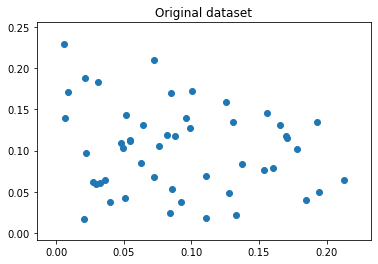

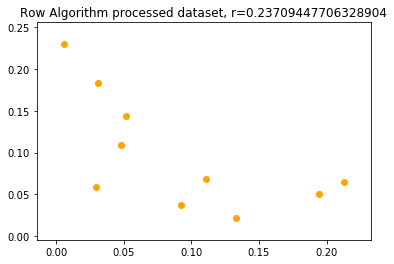

In [4]:
#Reduced dataset
X_reduced = np.empty([0,np.shape(X)[1]])
for k in range(n):
    if np.any( np.isnan(exemplars[k]) ):continue
    #print(exemplars[k])
    X_reduced = np.vstack((X_reduced, exemplars[k]))
    
#plot first two dimensions of original and reduced datasets.
X_original = np.asarray(X)
plt.figure(0)
plt.scatter(X_original[:,0], X_original[:,1])
plt.title('Original dataset')

X_reduced = np.asarray(X_reduced)
plt.figure(1)
plt.scatter(X_reduced[:,0], X_reduced[:,1],color='orange')
plt.title(f'Row Algorithm processed dataset, r={r}')